In [2]:
%pip install pandas
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df1 = pd.read_csv("dataset_grupo1.csv", encoding="latin1", sep=";")
df2 = pd.read_csv("dataset2_grupo1.csv", encoding="latin1", sep=";")
df3 = pd.read_csv("dataset3_grupo1.csv", encoding="latin1", sep=";")

#Dados = planilhona com todas as info
dados = df1.merge(df2, on="Data").merge(df3, on="Data")

print(dados.head())

dados.to_csv("dataset_unificado.csv", index=False, encoding="utf-8-sig")

#conferindo os dados:
print(dados.isnull().sum())
#não há n.a values
print(dados['Data'].value_counts().sort_index())

#aparentemente tudo certo :)
dados.head()

      Data  \
0  12/2006   
1  01/2007   
2  02/2007   
3  03/2007   
4  04/2007   

  433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal  \
0                                              0,48                            
1                                              0,44                            
2                                              0,44                            
3                                              0,37                            
4                                              0,25                            

  3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$  \
0                                            2,1372                                                 
1                                            2,1239                                                 
2                                            2,1174                                                 
3                             

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$,4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões),4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões),4470 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Banco Central - R$ (milhões),4472 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos estaduais - R$ (milhões),4473 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos municipais - R$ (milhões),13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões),13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %,"13763 - Dívida bruta do governo geral - Saldos em US$ milhões - Metodologia utilizada a partir de 2008 - US$ (milhões),,,,,,,,,,",4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.,"4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,","29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"
0,12/2006,"0,48","2,1372","215.338,3","727.318,55","8.481,33","316.863,54","47.073,27","1.336.644,90","55,48","625.418,73","13,19","0,99","21,98"
1,01/2007,"0,44","2,1239","206.662,3","739.728,91","-4.509,71","316.460,09","46.447,36","1.367.451,91","56,17","643.840,6","13,13","1,8","22,28"
2,02/2007,"0,44","2,1174","201.552,1","747.648,62","-4.194,13","317.158,09","46.653,24","1.399.083,71","56,90","660.755,51","12,93","0,87","22,48"
3,03/2007,"0,37","2,0496","223.208,6","750.319,85","5.830,79","316.163,14","46.477,56","1.423.273,45","57,24","694.415,23","12,74","1,5","22,4"
4,04/2007,"0,25","2,0331","218.931,2","745.927,20","7.990,12","314.070,80","46.673,09","1.438.854,85","57,17","707.714,75","12,58","0,94","22,36"


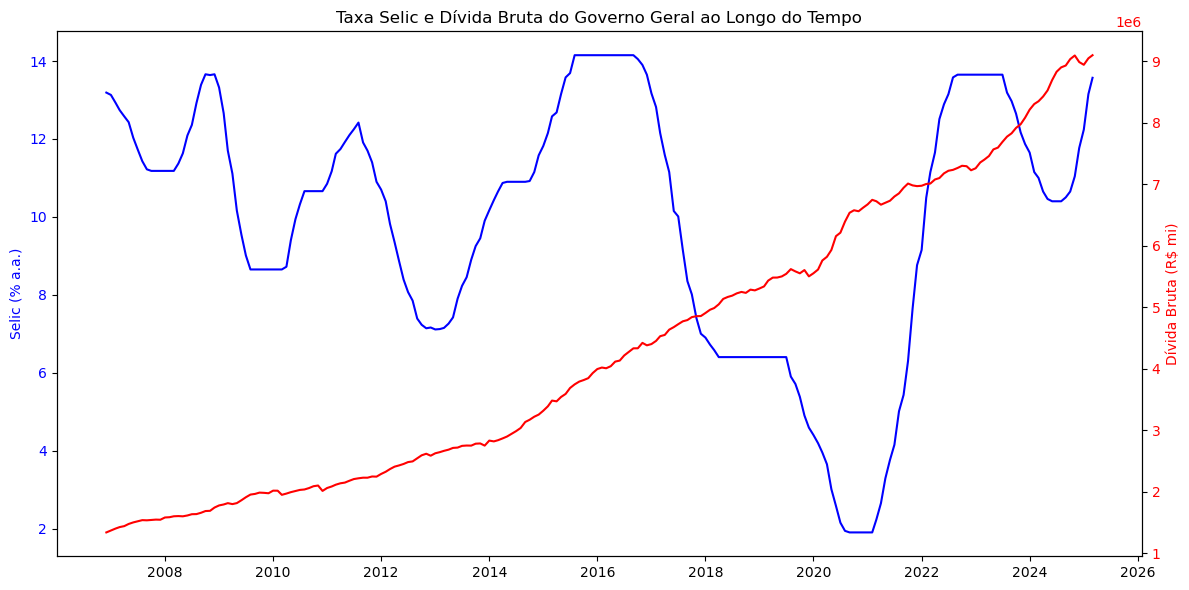

In [4]:
import matplotlib.pyplot as plt

#Taxa SELIC e Dívida Bruta
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

fig, ax1 = plt.subplots(figsize=(12, 6))

#Eixo Selic
ax1.plot(dados["Data"], dados["Selic (% a.a.)"], color='blue', label="Selic (% a.a.)")
ax1.set_ylabel("Selic (% a.a.)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#Eixo da Dívida
ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Dívida Bruta (R$ mi)"], color='red', label="Dívida Bruta (R$ milhões)")
ax2.set_ylabel("Dívida Bruta (R$ mi)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Taxa Selic e Dívida Bruta do Governo Geral ao Longo do Tempo")
fig.tight_layout()
plt.show()

Correlação de Pearson: 0.9283


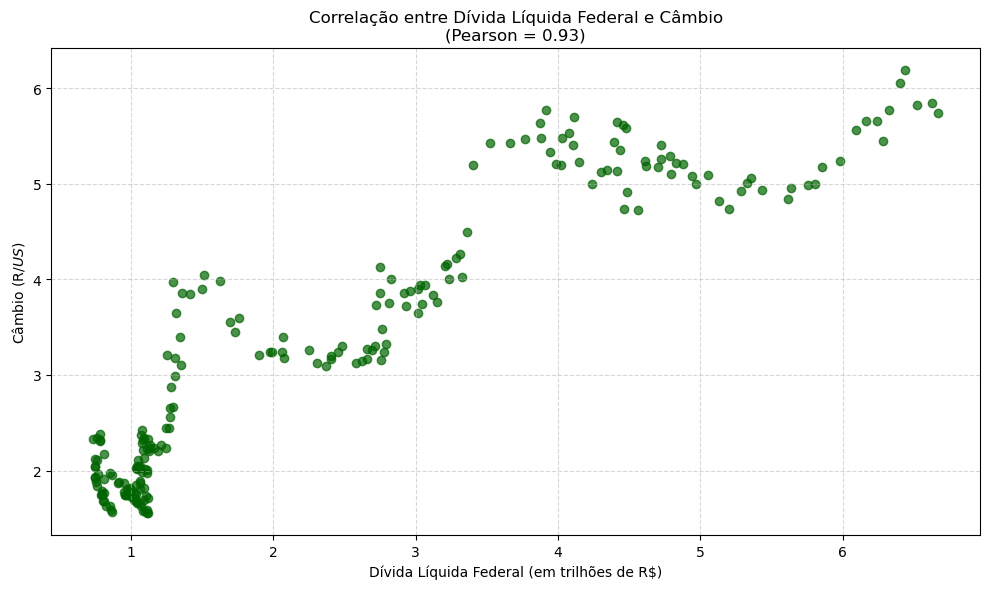

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Converter a coluna 'Data' para datetime
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

# Converter dívidas e câmbio para float
dados["Dívida Líquida Federal (R$ mi)"] = dados["4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"]\
    .str.replace(",", ".", regex=False).astype(float)

# Calcular correlação de Pearson
correlacao, _ = pearsonr(dados["Dívida Líquida Federal (R$ mi)"], dados["Câmbio (R$/US$)"])
print(f"Correlação de Pearson: {correlacao:.4f}")

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados["Dívida Líquida Federal (R$ mi)"] / 1_000_000, dados["Câmbio (R$/US$)"], alpha=0.7, color="darkgreen")
plt.title(f"Correlação entre Dívida Líquida Federal e Câmbio\n(Pearson = {correlacao:.2f})")
plt.xlabel("Dívida Líquida Federal (em trilhões de R$)")
plt.ylabel("Câmbio (R$/US$)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [20]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import pandas as pd
import matplotlib.pyplot as plt

# Converter as colunas, se ainda não foram
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"]\
    .str.replace(",", ".", regex=False).astype(float)

# Selecionar variáveis
divida_bruta = dados["Dívida Bruta (R$ mi)"]
cambio = dados["Câmbio (R$/US$)"]

#correlação de pearson
corr_cambiodivida, _ = pearsonr(divida_bruta, cambio)
print(f"Correlação de Pearson (linear):  {pearson_corr:.4f}")

#rquadrado
rsquared = pearson_corr ** 2
print(f"R quadrado é:  {rsquared:.4f}")




Correlação de Pearson (linear):  0.9585
R quadrado é:  0.9186


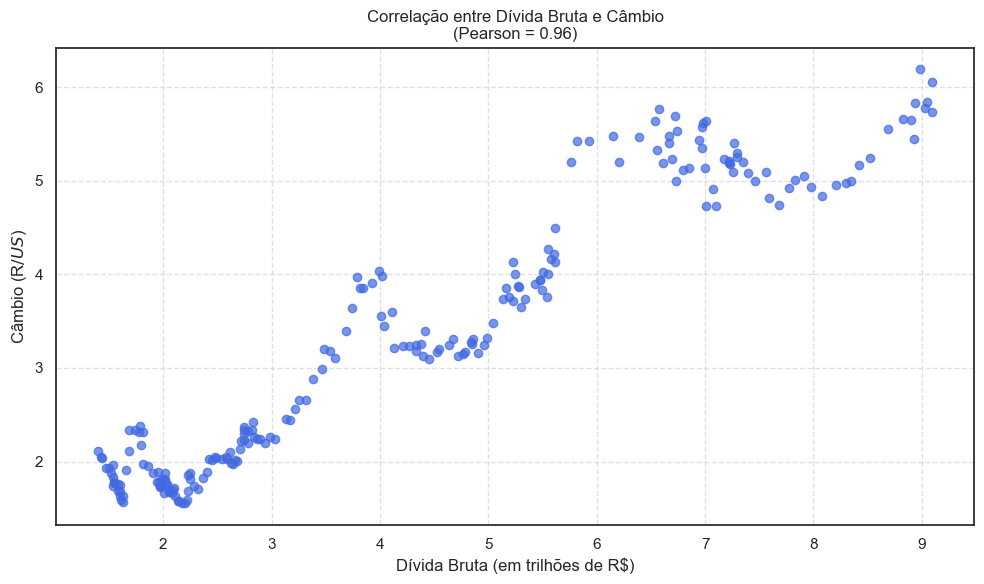

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(divida_bruta / 1_000_000, cambio, alpha=0.7, color="royalblue")
plt.title(f"Correlação entre Dívida Bruta e Câmbio\n(Pearson = {pearson_corr:.2f})")
plt.xlabel("Dívida Bruta (em trilhões de R$)")
plt.ylabel("Câmbio (R$/US$)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

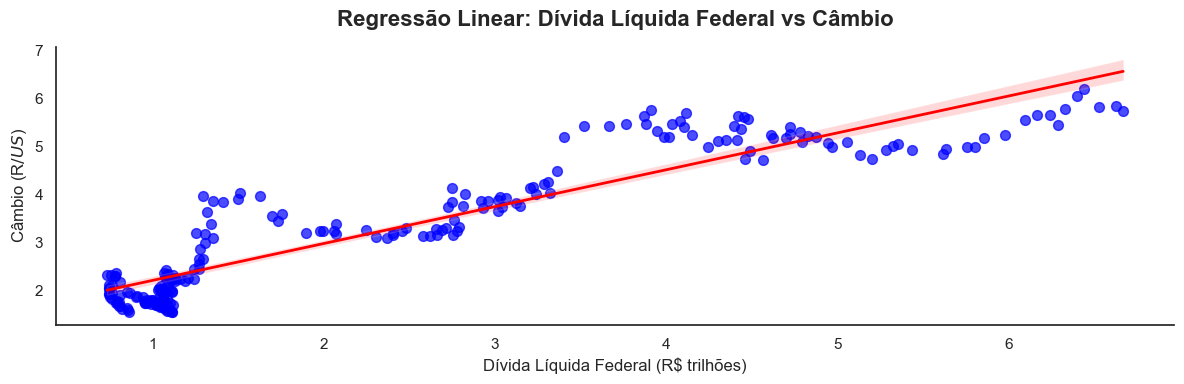

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Certifique-se de que os dados foram convertidos corretamente
dados["Dívida Líquida Federal (R$ tri)"] = dados["4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float) / 1_000_000  # convertendo p/ trilhões

dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"]\
    .str.replace(",", ".", regex=False).astype(float)

# Renomear para facilitar a plotagem
dados_corr = dados[["Dívida Líquida Federal (R$ tri)", "Câmbio (R$/US$)"]]

# Estilo do gráfico
plt.figure(figsize=(12, 4))
sns.set(style="white")

# Gráfico de regressão
sns.regplot(
    data=dados_corr,
    x="Dívida Líquida Federal (R$ tri)",
    y="Câmbio (R$/US$)",
    scatter_kws={"s": 50, "alpha": 0.7, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)

# Títulos e rótulos
plt.title("Regressão Linear: Dívida Líquida Federal vs Câmbio", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Dívida Líquida Federal (R$ trilhões)", fontsize=12)
plt.ylabel("Câmbio (R$/US$)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Layout e estilo
plt.grid(False)
plt.tight_layout()
sns.despine()
plt.show()



In [6]:
#relação entre o crescimento da dívida do governo e as variações da selic
import pandas as pd

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()

dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])

print(correlacao)

-0.05568478790529951


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")
dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)
dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()
dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

matriz_correlacao = dados[["Selic (% a.a.)", "Dívida Bruta (R$ mi)", "Aumento da Dívida (R$ mi)"]].corr()

# Heatmap cor da dev = inferno
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap="inferno", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Selic e Dívida")
plt.tight_layout()
plt.show()


KeyError: "['Aumento da Dívida (R$ mi)'] not in index"

In [ ]:
#correlação e rquadrado
correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Bruta (R$ mi)"])
print(correlacao)
rquadrado = correlacao ** 2
print(rquadrado)
#resultado tá bem baixo, imagino que tenham outros fatores que estejam no meio dificultando a análise

-0.16870177187583205
0.028460287834045278


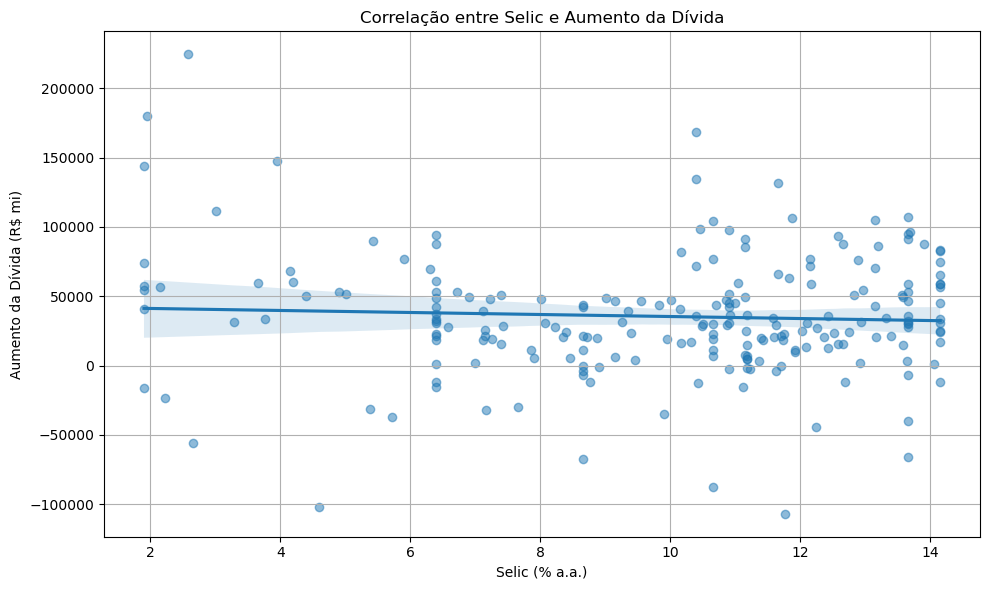

In [ ]:
#é a mesma correlação do heatmap, mas fiz em outro tipo de graph.

plt.figure(figsize=(10, 6))
sns.regplot(x="Selic (% a.a.)", y="Dívida Aumento (R$ mi)", data=dados, scatter_kws={"alpha":0.5})
plt.title("Correlação entre Selic e Aumento da Dívida")
plt.xlabel("Selic (% a.a.)")
plt.ylabel("Aumento da Dívida (R$ mi)")
plt.grid(True)
plt.tight_layout()
plt.show()


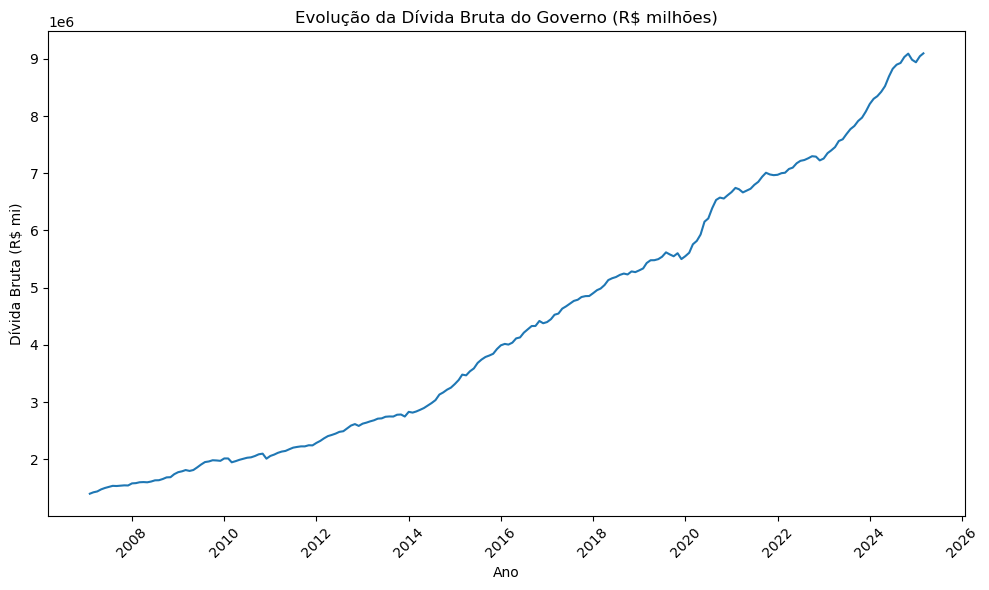

In [ ]:
#crescimento Dívida Bruta em linhas, gráfico legal pra introduzir

plt.figure(figsize=(10,6))
sns.lineplot(data=dados, x="Data", y="Dívida Bruta (R$ mi)")
plt.title("Evolução da Dívida Bruta do Governo (R$ milhões)")
plt.xlabel("Ano")
plt.ylabel("Dívida Bruta (R$ mi)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



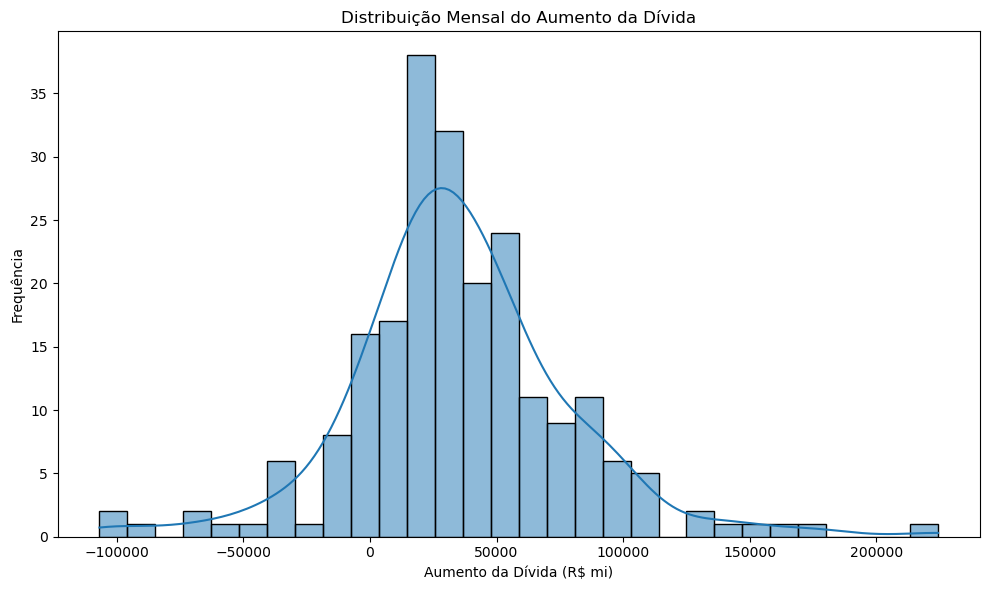

In [ ]:
#histograma

plt.figure(figsize=(10, 6))
sns.histplot(dados["Dívida Aumento (R$ mi)"], bins=30, kde=True)
plt.title("Distribuição Mensal do Aumento da Dívida")
plt.xlabel("Aumento da Dívida (R$ mi)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


In [ ]:
#vou tentar fazer por séries temporais, de crises em crises, vamos ver se dá certo

limite_alto = dados["Dívida Aumento (R$ mi)"].quantile(0.75)

dados["Aceleracao_Divida"] = dados["Dívida Aumento (R$ mi)"] > limite_alto

aceleracoes = dados[dados["Aceleracao_Divida"]][["Data", "Dívida Aumento (R$ mi)"]]
print(aceleracoes.head())


         Data  Dívida Aumento (R$ mi)
85 2014-01-01                81602.43
93 2014-09-01                97453.59
97 2015-01-01                62875.83
98 2015-02-01                71556.46
99 2015-03-01                93348.45
